In [1]:
import csv
import os
import numpy as np
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
file_path=os.path.expanduser('train.csv')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.isna().sum()

x    0
y    1
dtype: int64

In [4]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<Axes: >

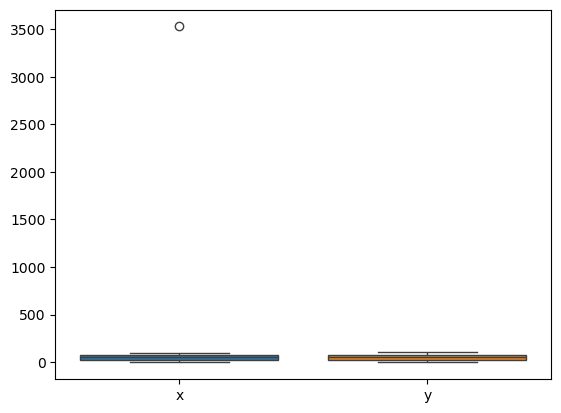

In [5]:
sns.boxplot(train_data)

In [6]:
train_data[train_data['x'] > 500] 

,x,y
213,3530.157369,NaN


In [7]:
train_data.dropna(axis='rows', inplace=True)

In [8]:
train_data.shape

(699, 2)

In [9]:
train_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

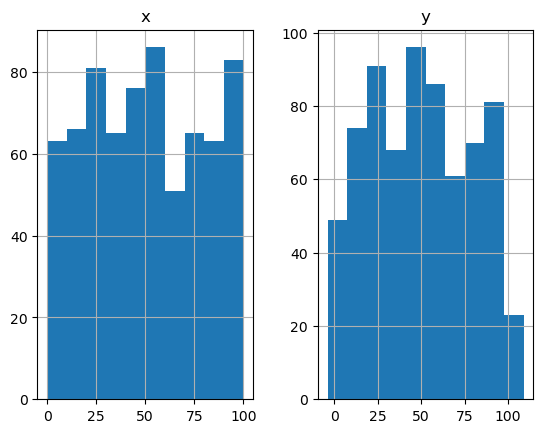

In [10]:
train_data.hist()

<Axes: >

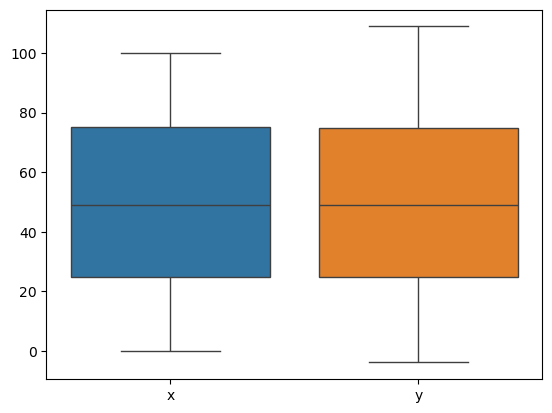

In [11]:
sns.boxplot(train_data)

Text(0, 0.5, 'Response Variable')

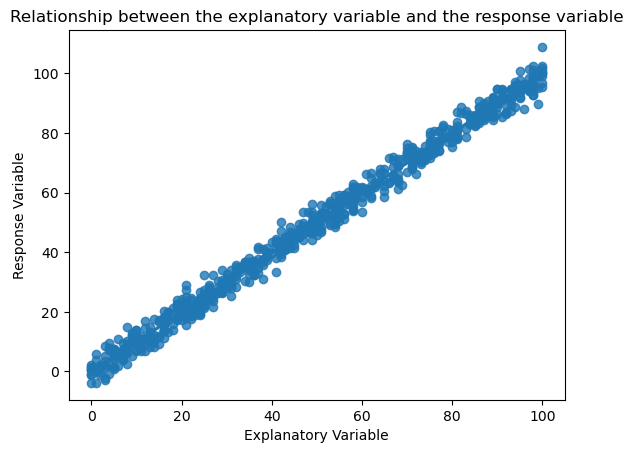

In [12]:
sns.regplot(x='x', y='y', data=train_data)
plt.title('Relationship between the explanatory variable and the response variable')
plt.xlabel('Explanatory Variable')
plt.ylabel('Response Variable')

In [13]:
X = train_data[['x']]
Y = train_data[['y']]
X.shape
Y.shape
X_test=test_data[['x']]
Y_test=test_data[['y']]

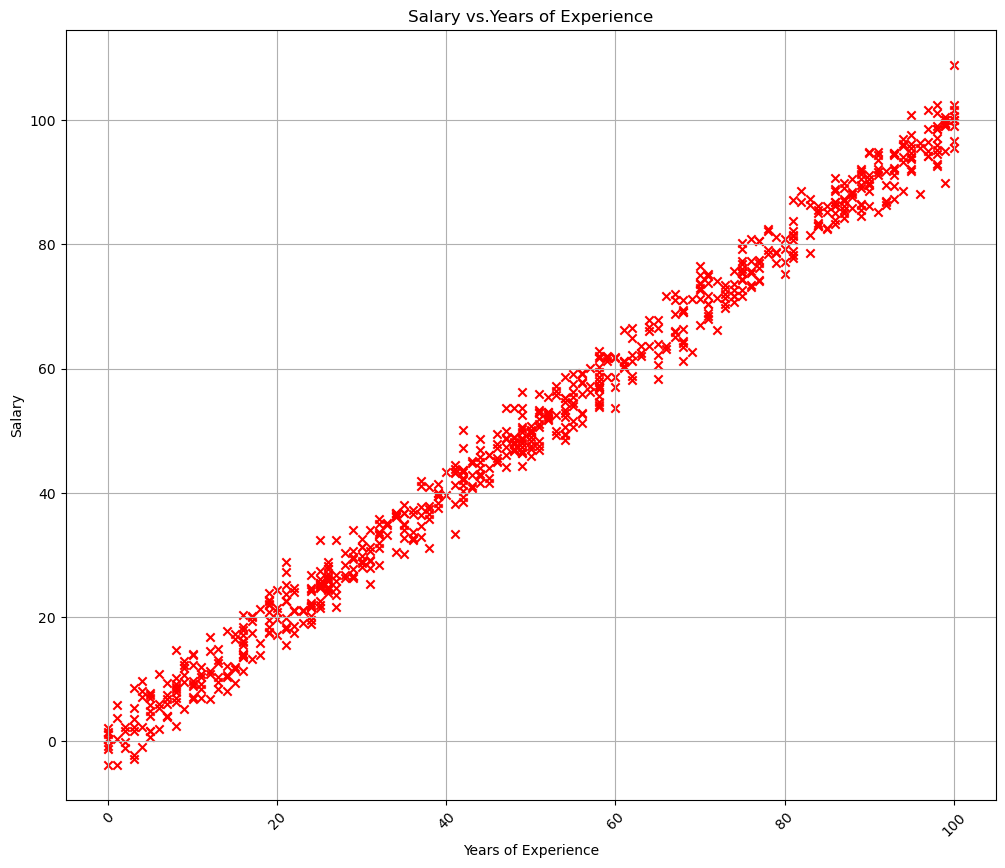

In [14]:


plt.figure(figsize=(12, 10))  # Increase the figure size

# Create a scatter plot of the data with red "x" markers
plt.scatter(X, Y, marker='x', c='r')

# Set the title
plt.title("Salary vs.Years of Experience")

# Set the y-axis label
plt.ylabel('Salary')

# Set the x-axis label
plt.xlabel('Years of Experience')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True)

plt.show()


In [15]:

# Create a scaler instance
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Apply Z-Score normalization to X
X_norm = scaler_X.fit_transform(X)

# Apply Z-Score normalization to Y
Y_norm = scaler_Y.fit_transform(Y)

print("Z-Score Normalized X:", X_norm)
print("Z-Score Normalized Y:", Y_norm)
r=X_norm.shape
t=Y_norm.shape
print(r)
print(t)

Z-Score Normalized X: [[-8.99096176e-01]
 [-4.94443564e-04]
 [-1.21015062e+00]
 [-4.15233705e-01]
 [ 1.27828495e+00]
 [-4.84356915e-01]
 [-1.31383544e+00]
 [ 1.07091531e+00]
 [-8.64534571e-01]
 [-1.55576667e+00]
 [-1.17558902e+00]
 [-1.17558902e+00]
 [-8.99096176e-01]
 [-3.80672100e-01]
 [ 1.37751977e-01]
 [ 3.45121607e-01]
 [-8.29972966e-01]
 [ 7.94422474e-01]
 [-7.26288151e-01]
 [-6.57164940e-01]
 [ 6.21614448e-01]
 [ 1.27828495e+00]
 [ 2.75998397e-01]
 [ 1.37751977e-01]
 [ 1.17460013e+00]
 [ 2.75998397e-01]
 [-3.50560487e-02]
 [-1.03734260e+00]
 [ 1.38196976e+00]
 [-6.96176538e-02]
 [-1.59032828e+00]
 [-8.64534571e-01]
 [-2.76987284e-01]
 [-1.72857470e+00]
 [ 3.45121607e-01]
 [ 1.48565458e+00]
 [-3.80672100e-01]
 [-1.48664346e+00]
 [-1.00278099e+00]
 [ 6.21614448e-01]
 [ 1.17460013e+00]
 [-1.72857470e+00]
 [ 2.75998397e-01]
 [-1.07190420e+00]
 [-4.84356915e-01]
 [-1.07190420e+00]
 [ 3.10560002e-01]
 [ 3.40671615e-02]
 [-1.07190420e+00]
 [-5.88041730e-01]
 [ 1.20916173e+00]
 [-2.0786

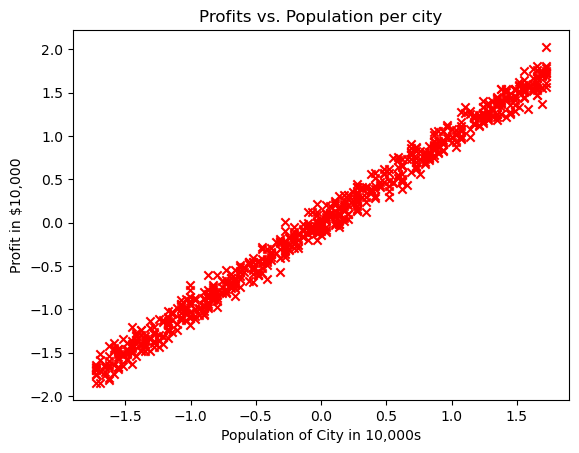

In [16]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters

plt.scatter(X_norm, Y_norm, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [17]:
def compute_cost(X,Y,w,b):
    m=X.shape[0]
    total_cost=0
    for i in range(m):
        f_wb=w*X[i]+b
        total_cost+=(f_wb-Y[i])**2
    total_cost=total_cost/(2*m)
    return total_cost
    

In [18]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, Y, w, b): 
    # Number of training examples
    m = X.shape[0]
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    ### START CODE HERE ###
    for i in range(m):
        f_wb=w*X[i]+b
        dj_dw_i=(f_wb-Y[i])*X[i]
        dj_db_i=f_wb-Y[i]
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [19]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X_norm, Y_norm, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): [-0.99533991] [2.28080152e-16]


In [20]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0.2
initial_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(X_norm, Y_norm, initial_w, initial_b)
print('Gradient at initial w, b (0.2):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (0.2): [-0.79533991] [0.2]


In [21]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [22]:
initial_w = 2
initial_b = 2
iterations = 15000
alpha = 0.001
w, b, _, _ = gradient_descent(X_norm, Y_norm, initial_w, initial_b, 
                               compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_16652\3642737384.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


Iteration    0: Cost     2.50   
Iteration 1500: Cost     0.13   
Iteration 3000: Cost     0.01   
Iteration 4500: Cost     0.00   
Iteration 6000: Cost     0.00   
Iteration 7500: Cost     0.00   
Iteration 9000: Cost     0.00   
Iteration 10500: Cost     0.00   
Iteration 12000: Cost     0.00   
Iteration 13500: Cost     0.00   
w,b found by gradient descent: [0.99534021] [6.07230232e-07]


In [23]:
m = X_norm.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_norm[i] + b

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_16652\3966094306.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * X_norm[i] + b


Text(0.5, 0, 'Population of City in 10,000s')

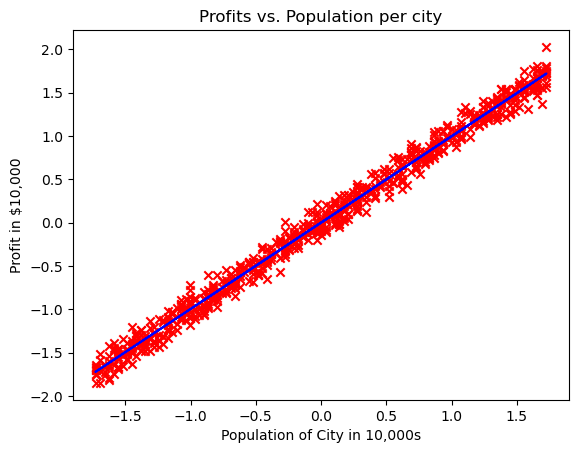

In [24]:
# Plot the linear fit
plt.plot(X_norm, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_norm, Y_norm, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [25]:
predict1 = 60* w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1))

predict2 = 10.6 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2))

For population = 35,000, we predict a profit of $59.72
For population = 70,000, we predict a profit of $10.55


C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_16652\2261895195.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('For population = 35,000, we predict a profit of $%.2f' % (predict1))
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_16652\2261895195.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('For population = 70,000, we predict a profit of $%.2f' % (predict2))


In [26]:
X_test_norm = scaler_X.transform(X_test)

# Make predictions using the model
prediction_norm = X_test_norm * w + b

# Convert the predictions back to the original scale
prediction = scaler_Y.inverse_transform(prediction_norm)

print("Normalized new values:", X_test_norm)
print("Predictions (normalized):", prediction_norm)
print("Predictions (original scale):", prediction)

Normalized new values: [[ 9.32668894e-01]
 [-1.00278099e+00]
 [-9.68219386e-01]
 [-1.03734260e+00]
 [-4.84356915e-01]
 [-1.21015062e+00]
 [ 4.14244818e-01]
 [ 1.55477779e+00]
 [-1.03734260e+00]
 [-1.55576667e+00]
 [-1.59032828e+00]
 [-1.07190420e+00]
 [ 1.58933939e+00]
 [ 4.14244818e-01]
 [-4.84356915e-01]
 [-1.21015062e+00]
 [ 5.17929633e-01]
 [-1.24471223e+00]
 [ 1.27828495e+00]
 [ 6.56176053e-01]
 [ 1.34740816e+00]
 [ 3.40671615e-02]
 [ 1.34740816e+00]
 [-7.95411361e-01]
 [ 1.62390100e+00]
 [ 2.75998397e-01]
 [ 1.00179210e+00]
 [-1.00278099e+00]
 [ 1.48565458e+00]
 [-7.95411361e-01]
 [ 1.69302421e+00]
 [-6.57164940e-01]
 [-5.88041730e-01]
 [ 1.03635371e+00]
 [-7.60849756e-01]
 [-1.04179259e-01]
 [ 1.03190372e-01]
 [ 6.56176053e-01]
 [-7.60849756e-01]
 [-5.88041730e-01]
 [ 1.41653137e+00]
 [ 7.25299264e-01]
 [-4.94443564e-04]
 [ 8.98107289e-01]
 [-1.59032828e+00]
 [-4.49795310e-01]
 [ 6.90737658e-01]
 [ 6.21614448e-01]
 [-3.46110495e-01]
 [-5.18918520e-01]
 [ 1.52021618e+00]
 [ 1.312